In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F

plt.ion()
sns.set( style="white" )

In [2]:
# First make sure our data sets look okay.
from musicml.train.common import load_compressed_pickle
data_sets = load_compressed_pickle( "midimodel.pkl.bz2" )

In [3]:
# Setup histogram bins for each source/target sequence.
from musicml.train import midimodel

bins = [0,
    midimodel.VocabularyIndexMap["NOTE_OFF<0>"],
    midimodel.VocabularyIndexMap["TIME_SHIFT<10>"],
    midimodel.VocabularyIndexMap["SET_VELOCITY<0>"],
    len( midimodel.Vocabulary )
]

In [8]:
# Setup up the music generator.
from musicml.generator import MusicGenerator
from musicml.hyperp import Hyperparameters
from musicml.train import midimodel

weights_path = "checkpoint-copy.wt"

hyper = Hyperparameters( midimodel.VocabularyLength, cache_attention_weights=True )
generator = MusicGenerator( hyper, weights_path )

(array([429., 429., 749., 393.]),
 array([  0, 128, 256, 356, 390]),
 <a list of 4 Patch objects>)

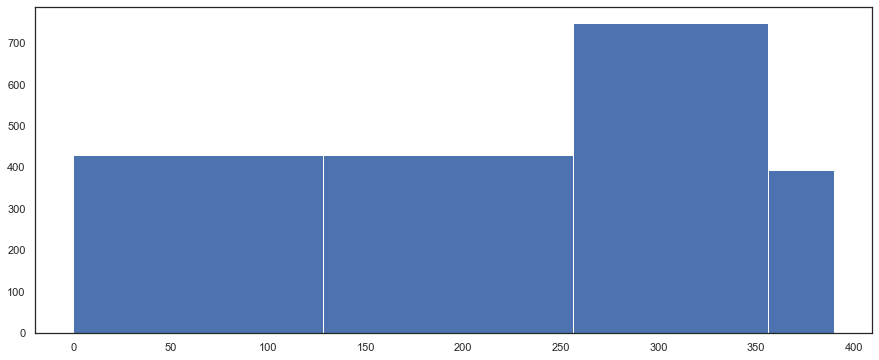

In [9]:
# Test against the first test data set's source sequence.
input_sequence = data_sets["train"][0].tolist()
#plt.figure( figsize=(15,6) )
#plt.hist( input_sequence, bins=bins )

In [10]:
# Run the encoder on the input sequence.
next_scores = generator.encode_inputs( input_sequence )
for ii in range( len( input_sequence[:10] ) ):
    print( midimodel.Vocabulary[next_scores[ii, :].argmax().item()] )

TIME_SHIFT<10>
TIME_SHIFT<10>
TIME_SHIFT<10>
TIME_SHIFT<10>
TIME_SHIFT<10>
TIME_SHIFT<10>
TIME_SHIFT<10>
TIME_SHIFT<10>
TIME_SHIFT<10>
TIME_SHIFT<10>


Encoder Layer (Attention Weights) 1


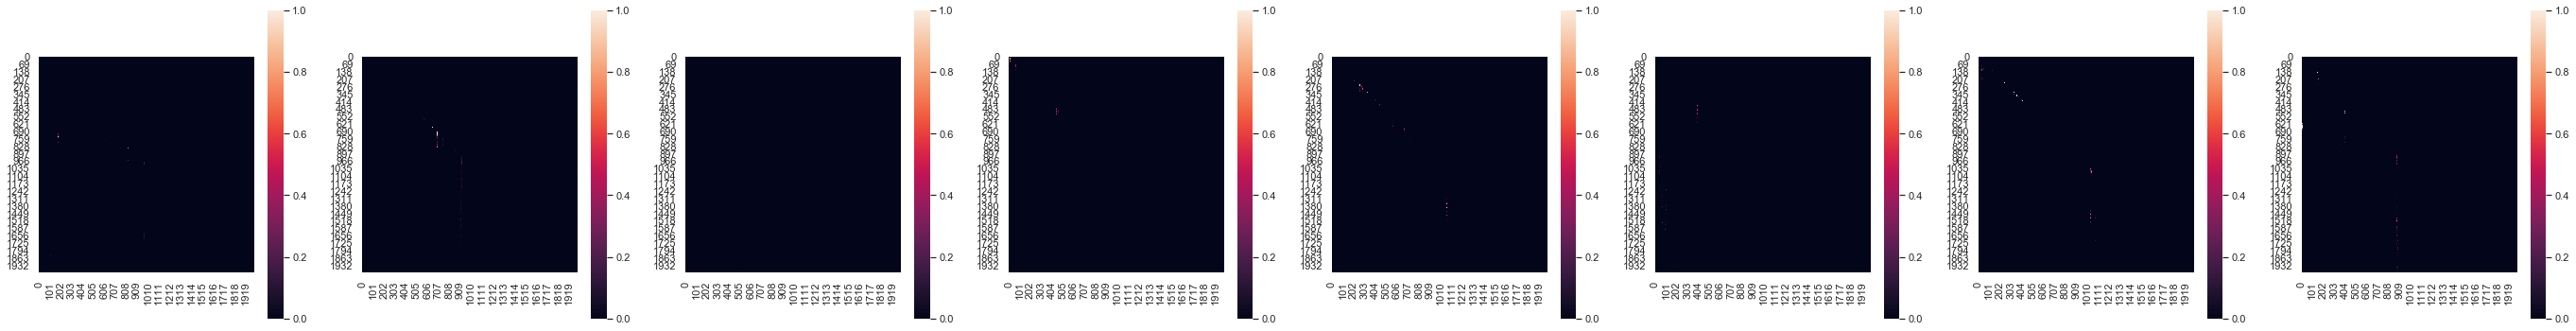

Encoder Layer (Attention Weights) 2


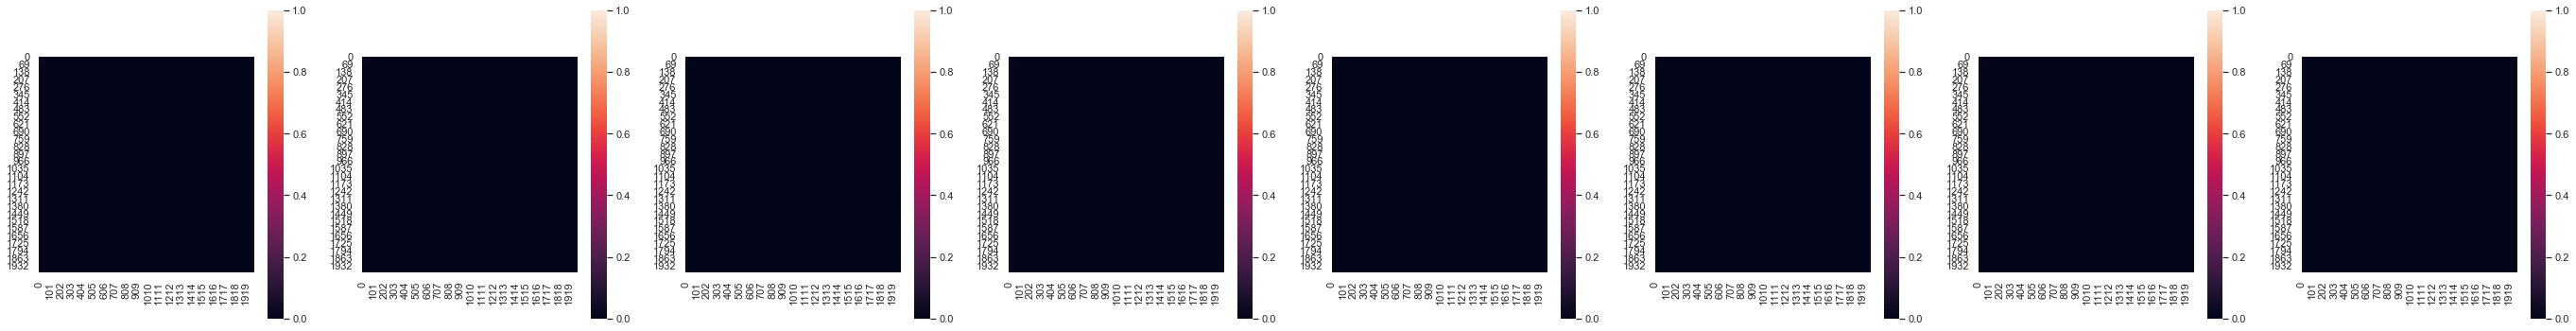

Encoder Layer (Attention Weights) 3


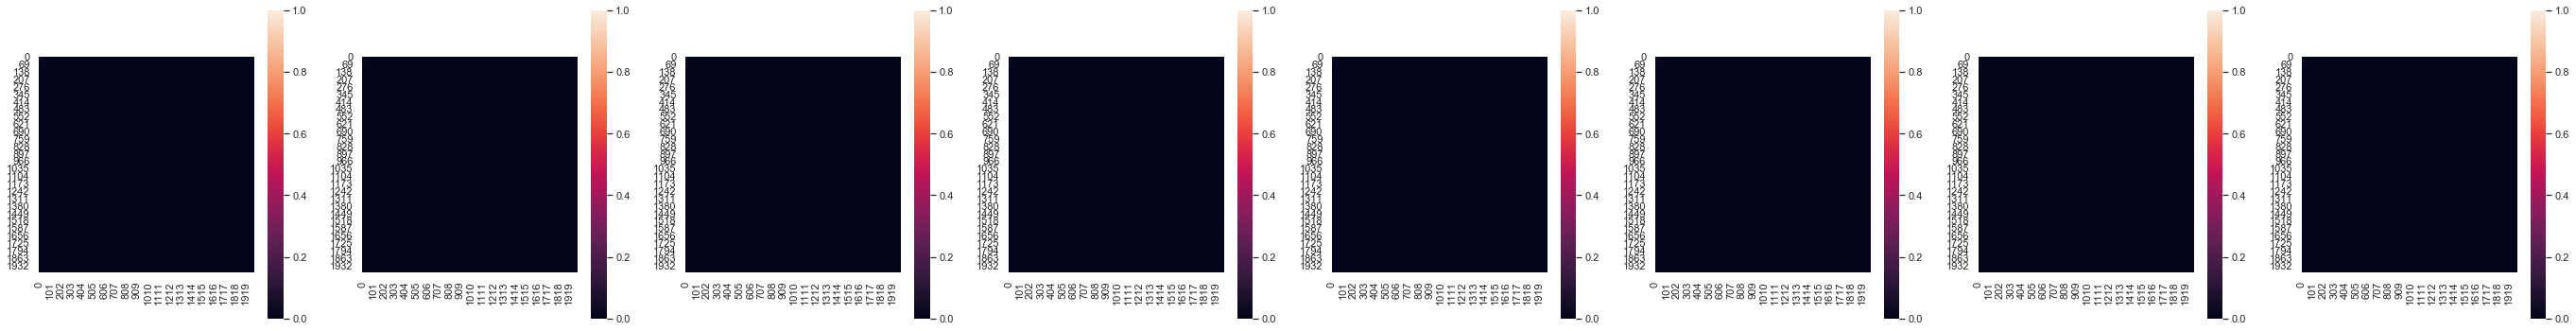

Encoder Layer (Attention Weights) 4


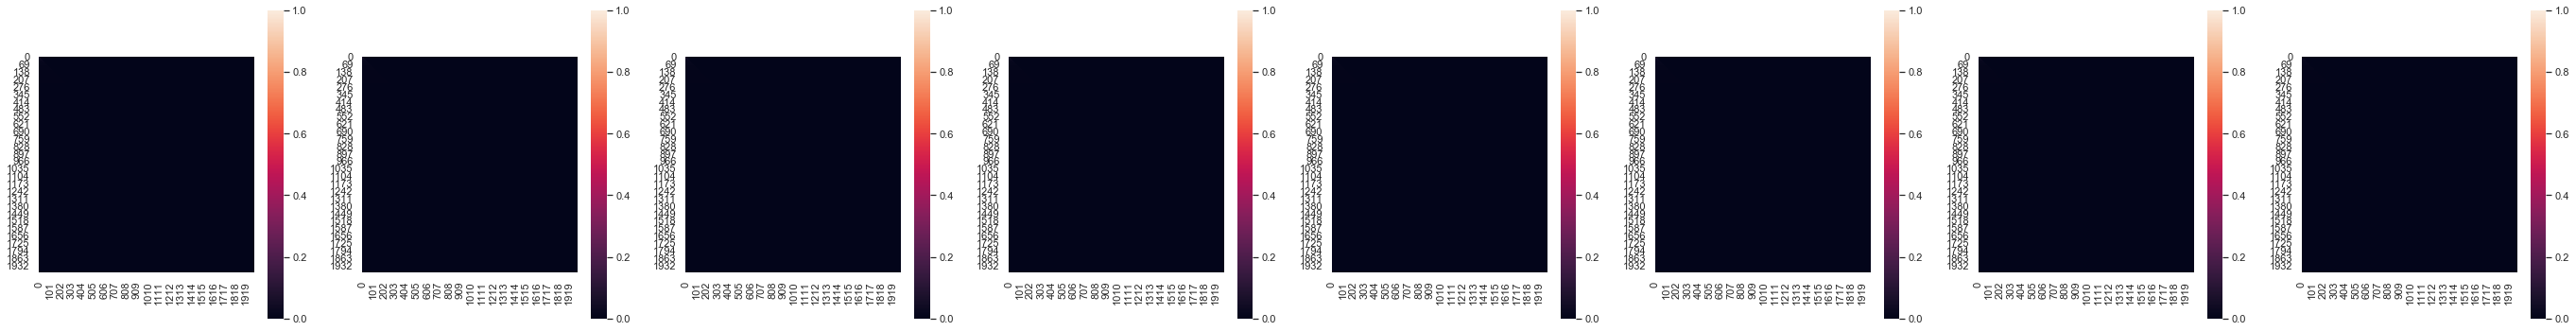

Encoder Layer (Attention Weights) 5


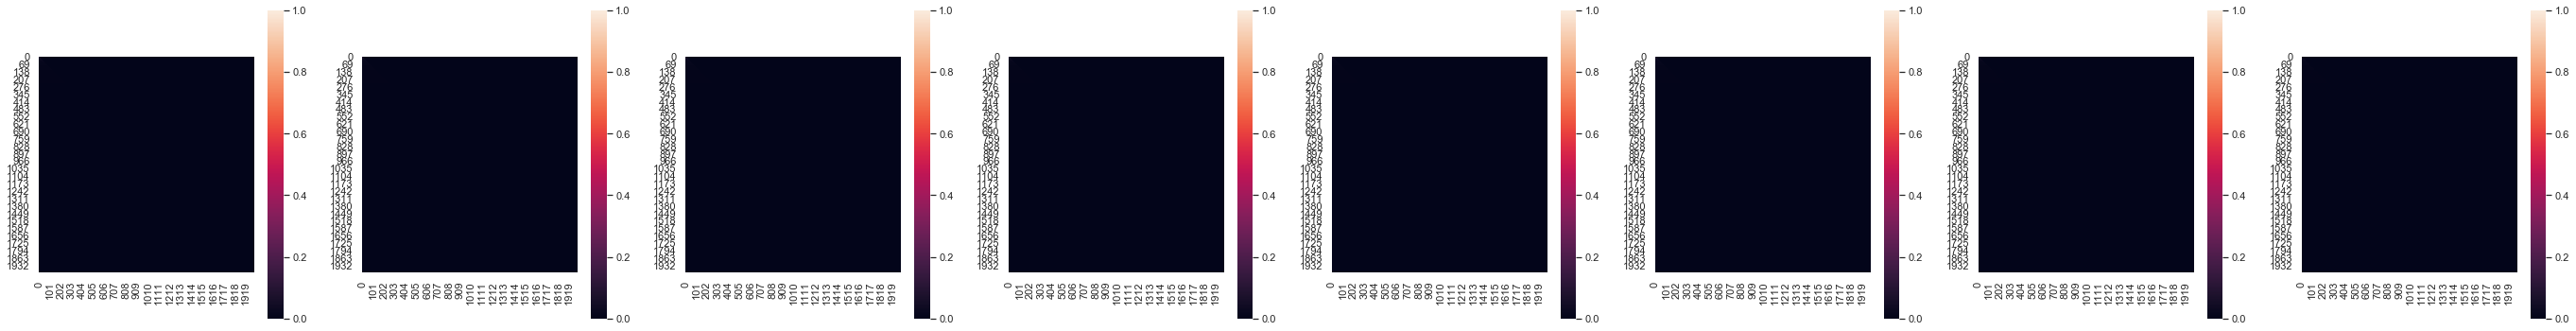

Encoder Layer (Attention Weights) 6


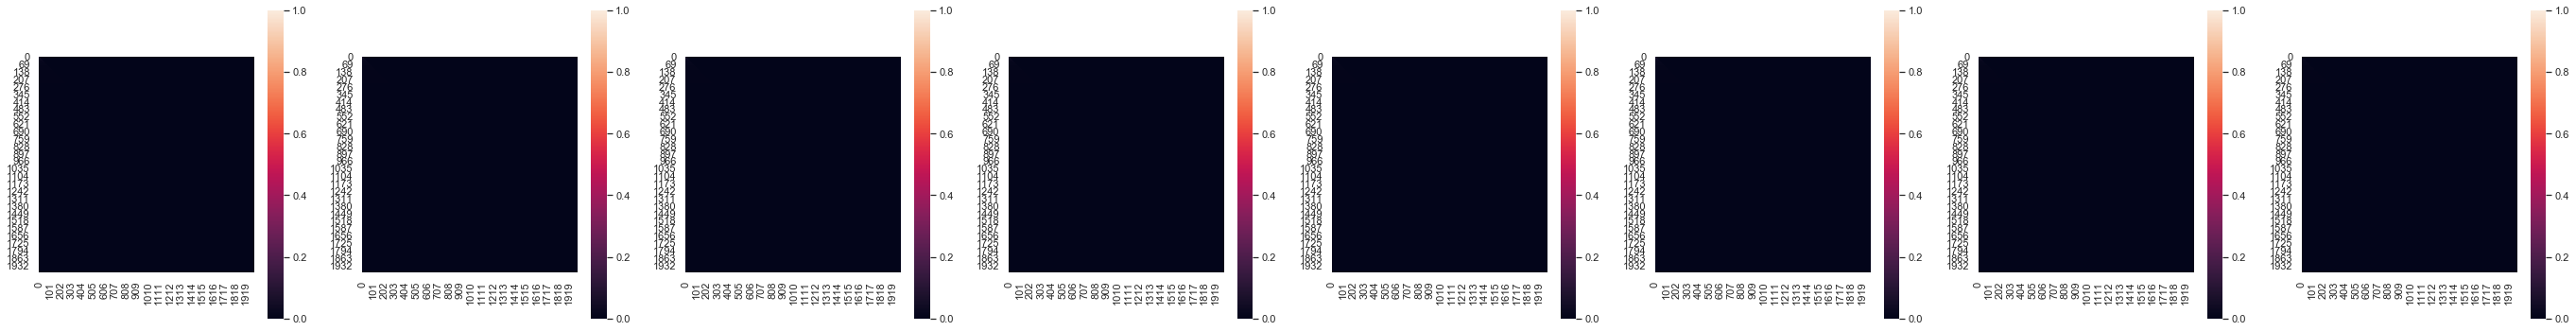

In [11]:
# Plot the encoder's attention weights (after softmax) for each attention head.
number_layers = len( generator.model.encoder.encoder_layers )
for layer_idx, layer in enumerate( generator.model.encoder.encoder_layers ):
    number_heads = layer.self_attention.number_heads
    _, axes = plt.subplots( 1, number_heads, figsize=(number_heads * 6, 6) )

    print( f"Encoder Layer (Attention Weights) {layer_idx + 1}" )
    for head_idx in range( number_heads ):
        att_w = layer.self_attention.attention_weights[head_idx].cpu()
        sns.heatmap( att_w, square=True, ax=axes[head_idx] )
    plt.show()

In [ ]:
# Plot the encoder's relative logits (before softmax) for each attention head.
number_layers = len( generator.model.encoder.encoder_layers )
for layer_idx, layer in enumerate( generator.model.encoder.encoder_layers ):
    number_heads = layer.self_attention.number_heads
    _, axes = plt.subplots( 1, number_heads, figsize=(number_heads * 6, 6) )

    print( f"Encoder Layer (Relative Logits) {layer_idx + 1}" )
    rel_logits = layer.self_attention.relative_logits.cpu()
    for head_idx in range( number_heads ):
        sns.heatmap( rel_logits[head_idx], square=True, ax=axes[head_idx] )
    plt.show()

In [ ]:
# Plot the encoder's invariant logits (before softmax and relative logits are added) for each attention head.
number_layers = len( generator.model.encoder.encoder_layers )
for layer_idx, layer in enumerate( generator.model.encoder.encoder_layers ):
    number_heads = layer.self_attention.number_heads
    _, axes = plt.subplots( 1, number_heads, figsize=(number_heads * 6, 6) )

    print( f"Encoder Layer (Invariant Logits) {layer_idx + 1}" )
    invariant_logits = F.softmax( layer.self_attention.invariant_logits.cpu(), dim=-1 )
    for head_idx in range( number_heads ):
        sns.heatmap( invariant_logits[head_idx], square=True, ax=axes[head_idx] )
    plt.show()

In [ ]:
# Plot the output of the encoder.
sns.set_style( "dark" )
plt.figure( figsize=(30, 8) )
plt.imshow( generator.model.encoder_output.data.cpu(), aspect="auto", cmap="Greys" )
plt.colorbar()